In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [28]:
multi_year_solar_CF = pd.DataFrame()
multi_year_wind_CF = pd.DataFrame() 

for i in range(5):
    multi_year_wind_CF[str(i)] = multi_year_wind.iloc[:, i]/renewable_capacity.iloc[0, i]
    multi_year_solar_CF[str(i)] = multi_year_solar.iloc[:, i]/renewable_capacity.iloc[1, i]

multi_year_solar_CF.to_csv('solar_CF.csv')
multi_year_wind_CF.to_csv('wind_CF.csv')

print(multi_year_solar_CF)

                       0    1    2    3    4
1980-01-01 00:00:00  0.0  0.0  0.0  0.0  0.0
1980-01-01 01:00:00  0.0  0.0  0.0  0.0  0.0
1980-01-01 02:00:00  0.0  0.0  0.0  0.0  0.0
1980-01-01 03:00:00  0.0  0.0  0.0  0.0  0.0
1980-01-01 04:00:00  0.0  0.0  0.0  0.0  0.0
...                  ...  ...  ...  ...  ...
2018-12-31 19:00:00  0.0  0.0  0.0  0.0  0.0
2018-12-31 20:00:00  0.0  0.0  0.0  0.0  0.0
2018-12-31 21:00:00  0.0  0.0  0.0  0.0  0.0
2018-12-31 22:00:00  0.0  0.0  0.0  0.0  0.0
2018-12-31 23:00:00  0.0  0.0  0.0  0.0  0.0

[341880 rows x 5 columns]


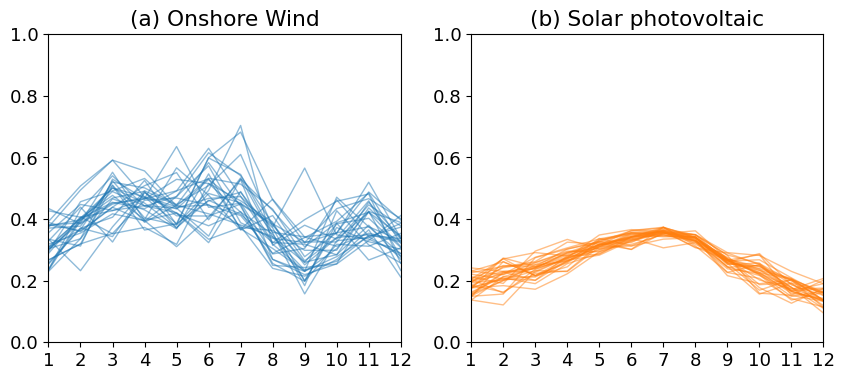

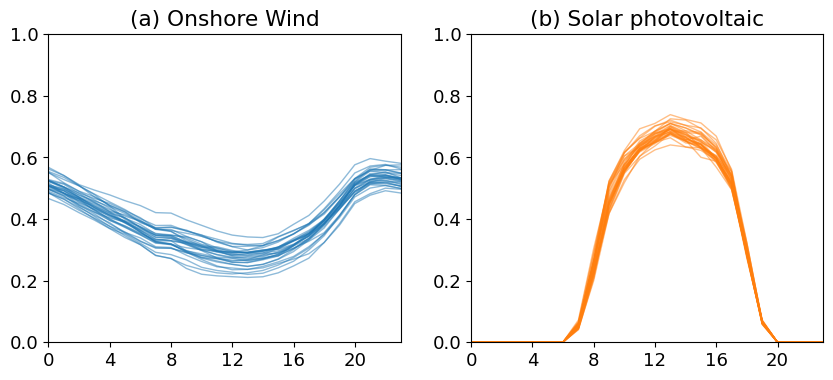

In [29]:
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['font.size'] = 13
plt.rcParams['text.color'] = 'black'

plt.figure(figsize=(10, 4))
plt.subplot(121)
for i in range(30):
    year_CF = multi_year_wind_CF[multi_year_wind_CF.index.year == 1980+i]['3']
    month_aveage = year_CF.groupby(by = year_CF.index.month).mean()
    plt.plot(month_aveage, label=1980+i, color='tab:blue', alpha=0.5)
plt.xticks(np.arange(1, 13))
plt.xlim(1, 12)
plt.ylim(0, 1)
plt.title('(a) Onshore Wind')
plt.subplot(122)
for i in range(30):
    year_CF = multi_year_solar_CF[multi_year_solar_CF.index.year == 1980+i]['3']
    month_aveage = year_CF.groupby(by = year_CF.index.month).mean()
    plt.plot(month_aveage, label=1980+i, color='tab:orange', alpha=0.5)
plt.xticks(np.arange(1, 13))
plt.xlim(1, 12)
plt.ylim(0, 1)
plt.title('(b) Solar photovoltaic')
plt.savefig('wind_CF_scaled.png')

plt.figure(figsize=(10, 4))
plt.subplot(121)
for i in range(30):
    year_CF = multi_year_wind_CF[multi_year_wind_CF.index.year == 1980+i]['3']
    daily_average = year_CF.groupby(by = year_CF.index.hour).mean()
    plt.plot(daily_average, label=1980+i, color='tab:blue', alpha=0.5)
plt.xticks(np.arange(0, 24, 4))
plt.xlim(0, 23)
plt.ylim(0, 1)
plt.title('(a) Onshore Wind')
plt.subplot(122)
for i in range(30):
    year_CF = multi_year_solar_CF[multi_year_solar_CF.index.year == 1980+i]['3']
    daily_average = year_CF.groupby(by = year_CF.index.hour).mean()
    plt.plot(daily_average, label=1980+i, color='tab:orange', alpha=0.5)
plt.xticks(np.arange(0, 24, 4))
plt.xlim(0, 23)
plt.ylim(0, 1)
plt.title('(b) Solar photovoltaic')
plt.savefig('solar_CF_scaled.png')

In [26]:
renewable_sample_new = pd.DataFrame()

for i in range(len(columns_name)):
    if i < len(columns_name)/2:
        renewable_sample_new[columns_name[i]] = np.average(renewable_sample[columns_name[i]])/np.average(multi_year_wind_CF[str(i)]) * multi_year_wind_CF[str(i)]
        renewable_sample_new[columns_name[i]] = renewable_sample_new[columns_name[i]].replace(0, 0.03)
    else:
        renewable_sample_new[columns_name[i]] = np.average(renewable_sample[columns_name[i]])/np.average(multi_year_solar_CF[str(i%5)]) * multi_year_solar_CF[str(i%5)]
    print(np.average(renewable_sample[columns_name[i]]), np.average(renewable_sample_new[columns_name[i]]))

renewable_sample_new.index = datetime_wind
renewable_sample_new.to_csv('Renewable_CF_multi_year_scale.csv')

0.33561038812783933 0.33706589965521677
0.33561038812783933 0.33706589965521677
0.4007608447488871 0.40451913005148077
0.30109526255712815 0.3025766206262923
0.3462328767123616 0.3499669365106323
0.23139771689498914 0.23161845907324535
0.23139771689498914 0.23161845907324535
0.1948498858447666 0.19505036807445353
0.21194349315066774 0.21221748391989192
0.18225057077628126 0.18253638408916556


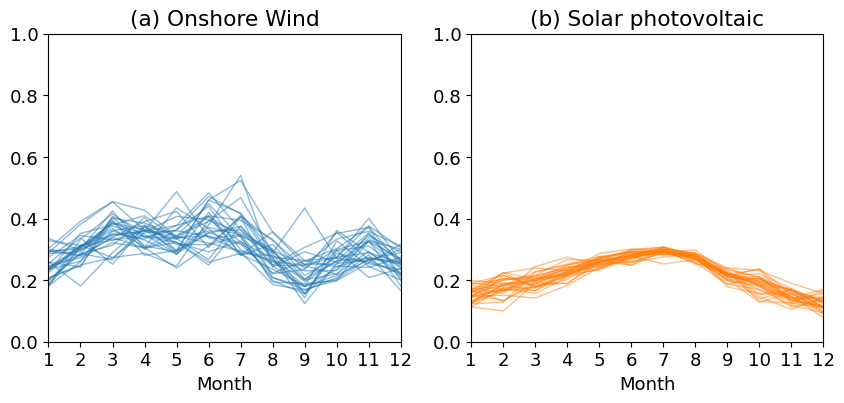

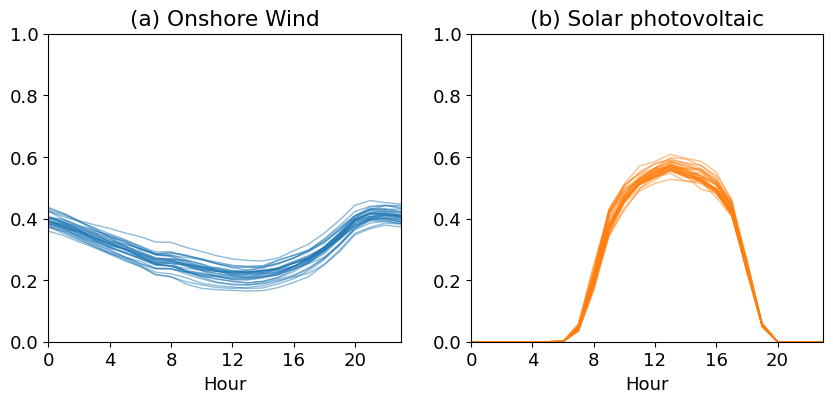

In [40]:
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['font.size'] = 13
plt.rcParams['text.color'] = 'black'

plt.figure(figsize=(10, 4))
plt.subplot(121)
for i in range(30):
    year_CF = renewable_sample_new[renewable_sample_new.index.year == 1980+i]['onshore_wind_turbine_ppa_2']
    month_aveage = year_CF.groupby(by = year_CF.index.month).mean()
    plt.plot(month_aveage, label=1980+i, color='tab:blue', alpha=0.5)
plt.xticks(np.arange(1, 13))
plt.xlabel('Month')
plt.xlim(1, 12)
plt.ylim(0, 1)
plt.title('(a) Onshore Wind')
plt.subplot(122)
for i in range(30):
    year_CF = renewable_sample_new[renewable_sample_new.index.year == 1980+i]['solar_photovoltaic_ppa_2']
    month_aveage = year_CF.groupby(by = year_CF.index.month).mean()
    plt.plot(month_aveage, label=1980+i, color='tab:orange', alpha=0.5)
plt.xticks(np.arange(1, 13))
plt.xlabel('Month')
plt.xlim(1, 12)
plt.ylim(0, 1)
plt.title('(b) Solar photovoltaic')
plt.savefig('wind_CF.png')

plt.figure(figsize=(10, 4))
plt.subplot(121)
for i in range(30):
    year_CF = renewable_sample_new[renewable_sample_new.index.year == 1980+i]['onshore_wind_turbine_ppa_2']
    daily_average = year_CF.groupby(by = year_CF.index.hour).mean()
    plt.plot(daily_average, label=1980+i, color='tab:blue', alpha=0.5)
plt.xticks(np.arange(0, 24, 4))
plt.xlabel('Hour')
plt.xlim(0, 23)
plt.ylim(0, 1)
plt.title('(a) Onshore Wind')
plt.subplot(122)
for i in range(30):
    year_CF = renewable_sample_new[renewable_sample_new.index.year == 1980+i]['solar_photovoltaic_ppa_2']
    daily_average = year_CF.groupby(by = year_CF.index.hour).mean()
    plt.plot(daily_average, label=1980+i, color='tab:orange', alpha=0.5)
plt.xticks(np.arange(0, 24, 4))
plt.xlabel('Hour')
plt.xlim(0, 23)
plt.ylim(0, 1)
plt.title('(b) Solar photovoltaic')
plt.savefig('solar_CF.png')